# Classification and Prediction of Parkinson's Disease based on vocal tests - Ganesh Ram Gururajan

## Data import and visualization

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('parkinsons.csv')

In [4]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


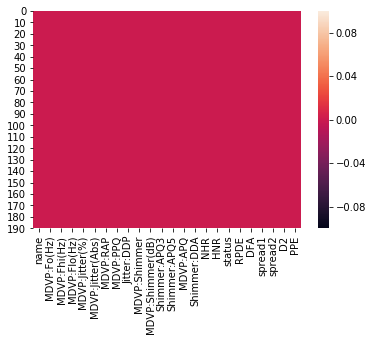

In [5]:
sns.heatmap(data.isnull())

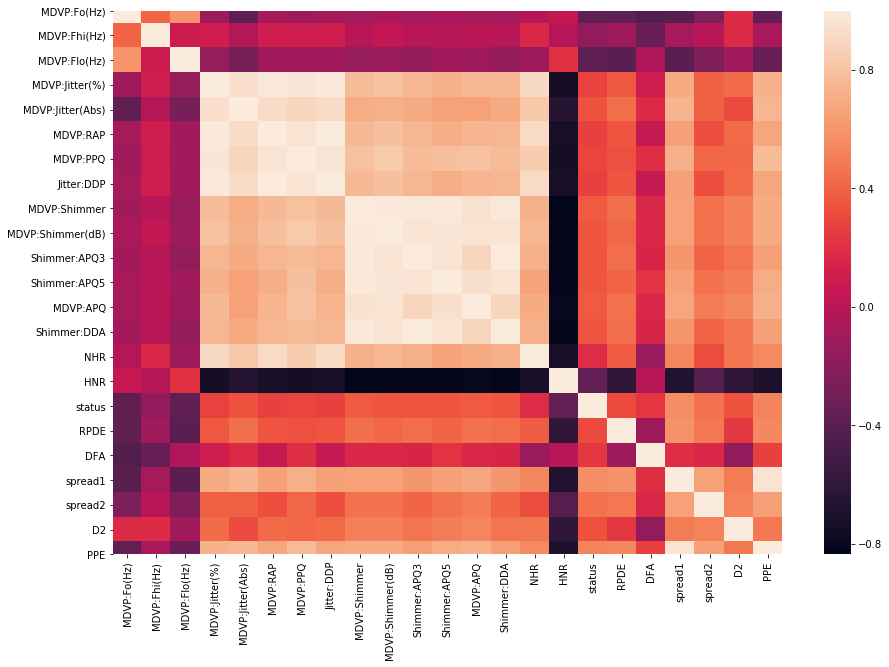

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr())

In [7]:
data['name'].value_counts()

phon_R01_S08_1    1
phon_R01_S26_6    1
phon_R01_S04_1    1
phon_R01_S06_6    1
phon_R01_S01_6    1
                 ..
phon_R01_S37_5    1
phon_R01_S04_4    1
phon_R01_S44_4    1
phon_R01_S35_2    1
phon_R01_S27_2    1
Name: name, Length: 195, dtype: int64

In [8]:
data.shape

(195, 24)

In [9]:
len(data['name'].value_counts().index)

195

In [10]:
data.drop(['name'],axis=1,inplace=True)

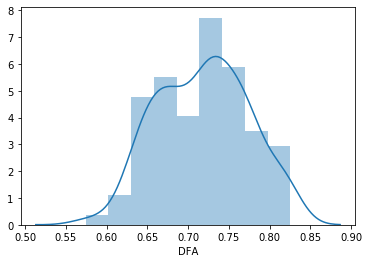

In [11]:
sns.distplot(data['DFA'])

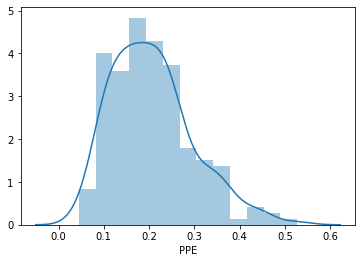

In [12]:
sns.distplot(data['PPE'])

In [13]:
data.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

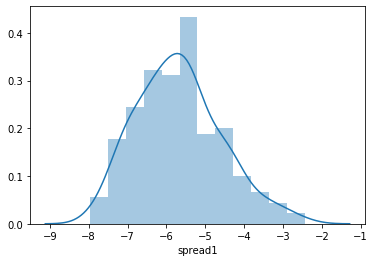

In [14]:
sns.distplot(data['spread1'])

# Train test split

In [15]:
X = data.drop(['status'],axis=1)
y = data['status']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100,stratify=y)

In [18]:
X_train.shape,y_train.shape

((156, 22), (156,))

# Machine Learning

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lg = LogisticRegression()

In [21]:
lg.fit(X_train,y_train)

/home/livewire/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
pred1 = lg.predict(X_test)

# Logistic Regression Evaluation

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39



In [25]:
print(confusion_matrix(y_test,pred1))

[[ 7  3]
 [ 0 29]]


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()

In [28]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
pred2 = dt.predict(X_test)

# Decision Tree Evaluation

In [30]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39



In [31]:
print(confusion_matrix(y_test,pred2))

[[ 9  1]
 [ 3 26]]


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier()

In [34]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
pred3 = rf.predict(X_test)

# Random Forest Evaluation

In [36]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        29

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [37]:
print(confusion_matrix(y_test,pred3))

[[10  0]
 [ 0 29]]


# AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
ada = AdaBoostClassifier()

In [40]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [41]:
pred4 = ada.predict(X_test)

# Adaboost Evaluation

In [42]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39



In [43]:
print(confusion_matrix(y_test,pred4))

[[ 9  1]
 [ 2 27]]


# XGBoost

In [44]:
from datetime import datetime

In [45]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [46]:
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [78]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [79]:
pred5 = xgb.predict(X_test)

# XGBoost Evaluation

In [80]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.97      0.98        29

    accuracy                           0.97        39
   macro avg       0.95      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



In [81]:
print(confusion_matrix(y_test,pred5))

[[10  0]
 [ 1 28]]


# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
pred6 = knn.predict(X_test)

# KNN Evaluation

In [ ]:
print(classification_report(y_test,pred6))

In [ ]:
print(confusion_matrix(y_test,pred6))

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

In [ ]:
pred7 = gnb.predict(X_test)

# Naive Bayes Prediction

In [ ]:
print(classification_report(y_test,pred7))

In [ ]:
print(confusion_matrix(y_test,pred7))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train,y_train)

In [ ]:
pred8 = gbc.predict(X_test)

In [ ]:
print(classification_report(y_test,pred8))

In [ ]:
print(confusion_matrix(y_test,pred8))

# Best Model is XGBoost Classfier for this problem and Dataset

# Thank You